In [1]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import numpy as np 
from tfidf import TFIDF
import matplotlib.pyplot as plt
from keras.models import model_from_json
from random import shuffle

In [2]:
xdata = []
ydata = []
tfidf_data = None
model_loaded = None
training_data='data/Data clear.csv'

In [3]:
def preproses(filepath):
    f = open(filepath, encoding='utf-8')

    # split new line
    sents = f.read().split('\n')

    # shuffle all sentences order
    shuffle(sents)

    # on each sentence
    # - split by semicolon
    # - append to variable
    if len(xdata) == 0 and len(ydata) == 0:
        for sent in sents:
            temp = sent.split(';')
            if len(temp) == 2:
                xdata.append(temp[0])
                ydata.append([int(temp[1])])
    tfidf_data = TFIDF([xdata, ydata])
    
    return tfidf_data

In [4]:
tfidf_data = preproses(training_data)

c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
print(len(tfidf_data.onlyX))

789


In [6]:
def save_model(model, filename='model'):
    # Save model
    model_json = model.to_json()
    with open("model/" + filename + ".json", "w") as json_file:
        json_file.write(model_json)

    # Save weight
    model.save_weights("model/" + filename + ".h5")
    print("Saved model to disk")

In [7]:
def train(output_filename = 'model'):
    split_size = round(0.8 * len(ydata))
    
    X_train = tfidf_data.getOnlyX()[:split_size]
    Y_train = ydata[:split_size]
    X_test = tfidf_data.getOnlyX()[split_size:]
    Y_test = ydata[split_size:]
    print(len(X_train))
    print(len(Y_train))
    print(len(X_test))
    print(len(Y_test))
    
    # initialize model
    model = Sequential()

    # i am using heuristic for network layer by following guides:
    # - use only 4 layer
    # - number of nodes on each layer:
    # - - first layer 	: eq to data features dimension length (max. 300)
    # - - second layer 	: eq to .39 of first layer (activated by tanh)
    # - - third layer 	: 5 (activated by tanh)
    # - - output layer 	: 1 (activated by sigmoid)
    input_data_dimension = len(X_train[0])
    input_data_dimension = 300 if input_data_dimension > 300 else input_data_dimension

    model.add(Dense(units=int(0.39 * input_data_dimension), activation='tanh', input_dim=input_data_dimension))
    model.add(Dense(units=5, activation='tanh'))
    model.add(Dense(units=1, activation='sigmoid'))

    # loss error using binary crossentropy with backpropagation sgd optimizer
    # try lower learning rate on big number of training data
    learning_rate 	= .01
    loss_error		= 'binary_crossentropy'
    batch_size		= 1
    epoch 			= 20

    sgd = SGD(learning_rate=learning_rate)
    model.compile(loss=loss_error, optimizer=sgd, metrics=['accuracy'])

    # start building network
    history = model.fit(np.array(X_train), np.array(Y_train), batch_size=batch_size, epochs=epoch, validation_data=(np.array(X_test), np.array(Y_test)))

    # saving model
    save_model(model, output_filename)
    
    return history

In [8]:
def load_model(filename='model'):
    model = Sequential()

    # START LOADING MODEL
    # Loading model and weight from saved data
    # - load model
    json_file = open("model/" + filename + ".json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    
    # - load weights
    model.load_weights("model/" + filename + ".h5")
    print("Loaded model from disk")
    # END LOADING MODEL

    model_loaded = model
    return model_loaded

In [9]:
def getBinaryResult(x):
    return "POSITIF" if x >= 0.5 else "NEGATIF"

In [10]:
def predict_probability(model_loaded, x):
    if model_loaded == None:
        print("No model found! Load/train your model first to make a test")
        exit(0)
		
    return model_loaded.predict(np.array(x))

In [11]:
def predict_binary_results(model_loaded, x):
    if model_loaded == None:
        print("No model found! Load/train your model first to make a test")
        exit(0)
		
    return getBinaryResult(predict_probability(model_loaded, np.array(x)))

In [12]:
history = train()

631
631
158
158
Epoch 1/20
631/631 [==============================] - 1s 2ms/step - loss: 0.6723 - accuracy: 0.5800 - val_loss: 0.6887 - val_accuracy: 0.4684
Epoch 2/20
631/631 [==============================] - 1s 1ms/step - loss: 0.6218 - accuracy: 0.7147 - val_loss: 0.5869 - val_accuracy: 0.7722
Epoch 3/20
631/631 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7908 - val_loss: 0.5005 - val_accuracy: 0.8291
Epoch 4/20
631/631 [==============================] - 1s 1ms/step - loss: 0.4443 - accuracy: 0.8431 - val_loss: 0.4223 - val_accuracy: 0.8291
Epoch 5/20
631/631 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8716 - val_loss: 0.3894 - val_accuracy: 0.8038
Epoch 6/20
631/631 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.8906 - val_loss: 0.3889 - val_accuracy: 0.8228
Epoch 7/20
631/631 [==============================] - 1s 1ms/step - loss: 0.2494 - accuracy: 0.9208 - val_loss: 0.3738 - val_accurac

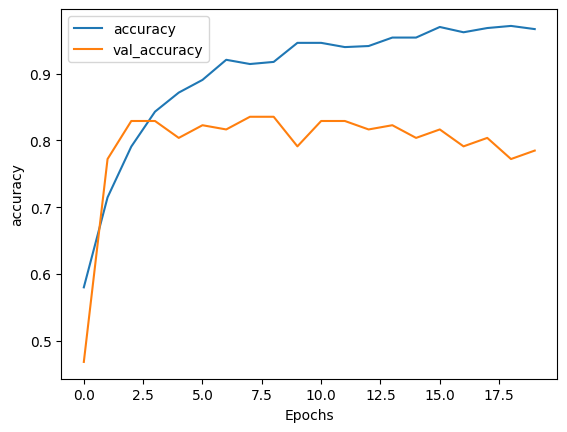

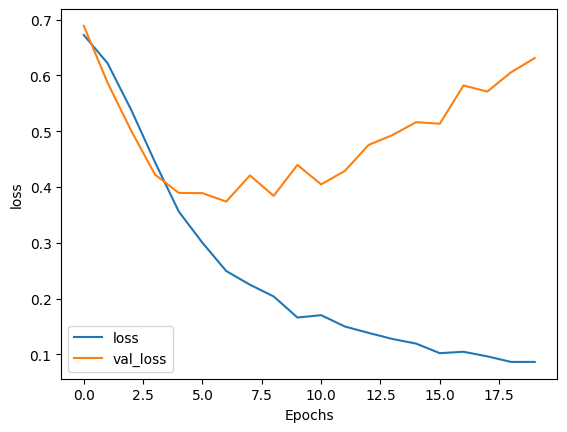

In [13]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
model = load_model()
test = "influencer ini adalah influencer yang beres amanah jujur"
print (test)
print (predict_probability(model, [tfidf_data.transform(test)]))

Loaded model from disk
influencer ini adalah influencer yang beres amanah jujur
1/1 [==============================] - 0s 85ms/step
[[0.9986474]]


In [15]:
test = "influencer ini adalah influencer yang beres amanah jujur"
print (test)
print (predict_binary_results(model, [tfidf_data.transform(test)]))

influencer ini adalah influencer yang beres amanah jujur
1/1 [==============================] - 0s 22ms/step
POSITIF
